<a href="https://colab.research.google.com/github/bryaanabraham/Machine_Learning/blob/main/Bikes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

Dataset: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand <br><br>
Additional Information<br>
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.



In [16]:
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [17]:
df.columns = cols
df["functional"] = (df["functional"] == "Yes").astype(int)

We are going to consider the data only at noon, so we only take dataset values at 'hour' = 12 and now drop the hour column as it is redundant

In [18]:
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


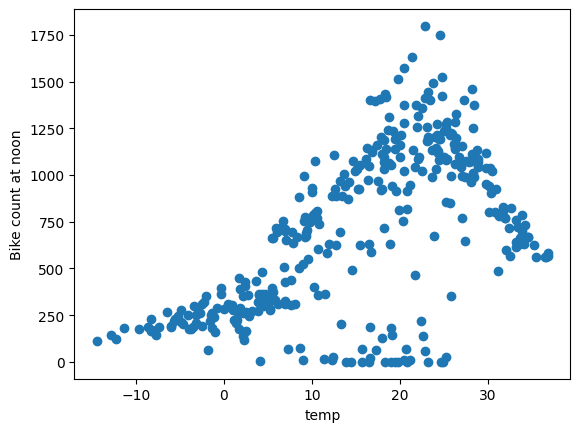

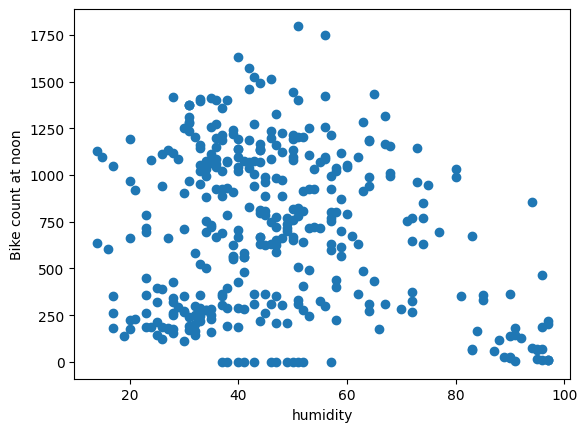

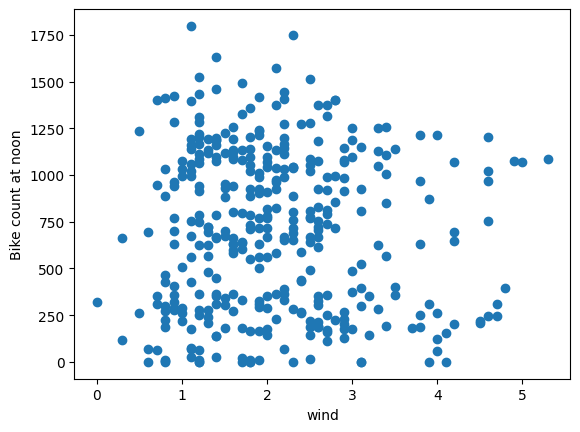

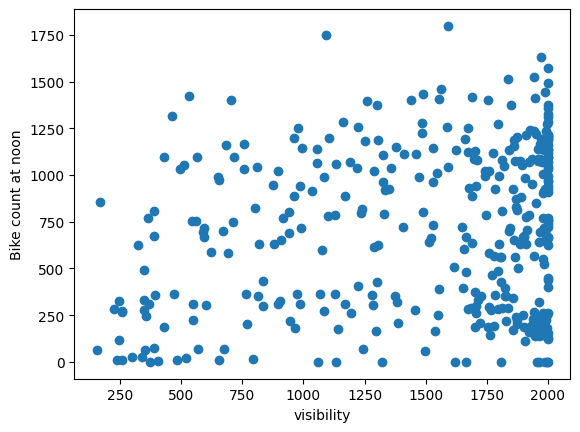

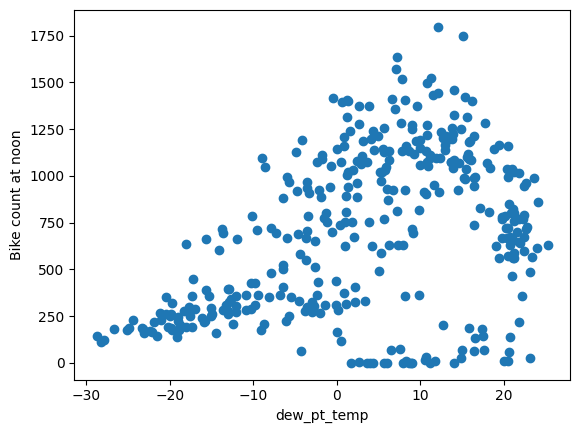

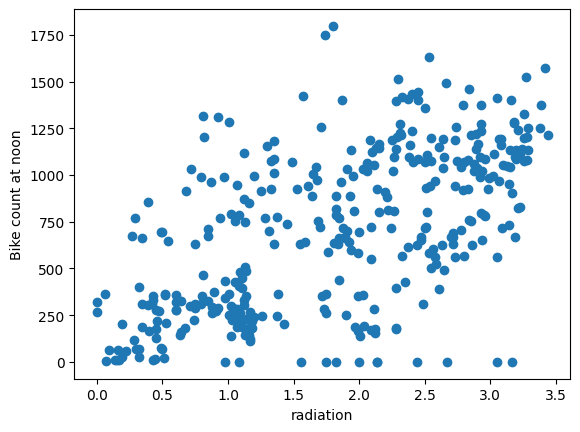

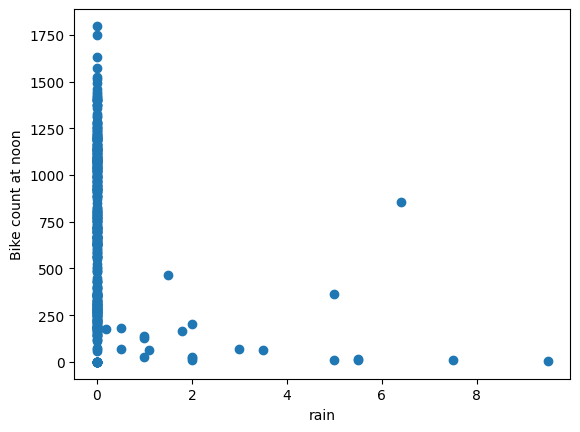

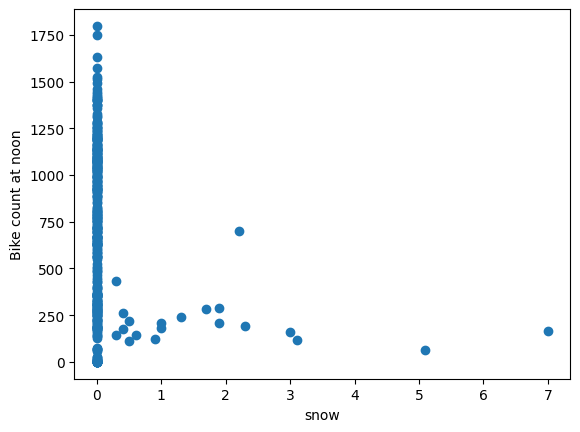

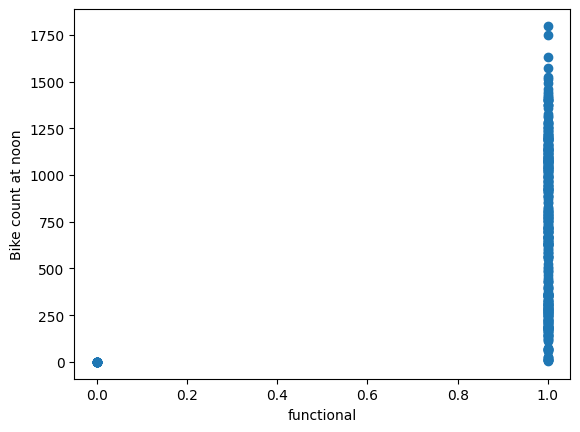

In [19]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.xlabel(label)
  plt.ylabel("Bike count at noon")
  plt.show()

We can see that the variables wind, visibility and functional have no effect on the target variable and must be dropped

In [20]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [21]:
train, valid, test = np.split(df.sample(frac=1), [int (0.6*len(df)), int (0.8*len(df))])

##Regression


In [22]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X, y))
  return data, X, y

###One dimensional

In [23]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, X_test_temp, y_test_temp= get_xy(test, "bike_count", x_labels = ["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels = ["temp"])

In [24]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [25]:
temp_reg.score(X_test_temp, y_test_temp)

0.3640691255210372

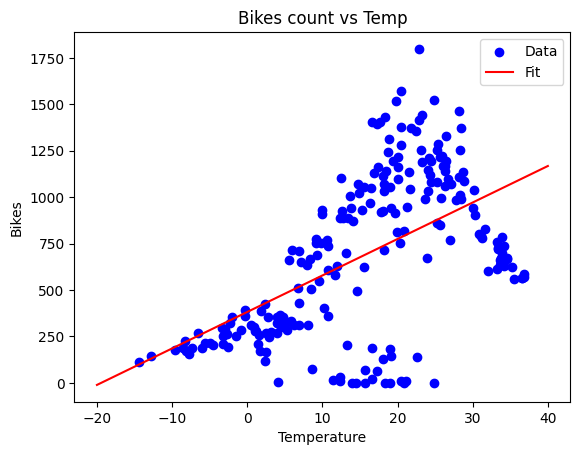

In [26]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red")
plt.title("Bikes count vs Temp")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Bikes")
plt.show()

## Multiple Linear regression

In [27]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [28]:
train, valid, test = np.split(df.sample(frac=1), [int (0.6*len(df)), int (0.8*len(df))])

_, X_train, y_train = get_xy(train, "bike_count", x_labels = df.columns[1:])
_, X_test, y_test= get_xy(test, "bike_count", x_labels = df.columns[1:])
_, X_valid, y_valid = get_xy(valid, "bike_count", x_labels = df.columns[1:])

In [29]:
mul_reg = LinearRegression()
mul_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
mul_reg.score(X_test, y_test)

0.548766350424291

##Regression with a neural network

In [58]:
def plot_loss(history):
  plt.plot(history.history['loss'], label="loss")
  plt.plot(history.history['val_loss'], label="val_loss")
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid(True)
  plt.show()

In [59]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])


In [60]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

In [61]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1),
    y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp)
)

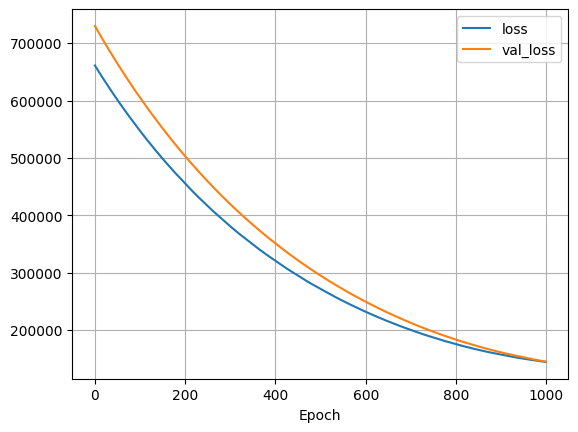

In [62]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


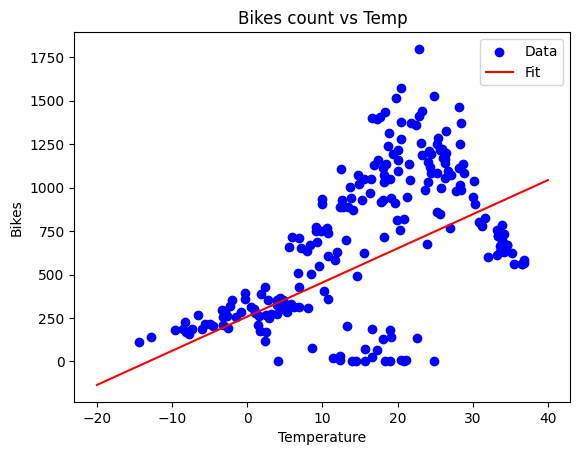

In [64]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red")
plt.title("Bikes count vs Temp")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Bikes")
plt.show()